  .

# <center>MBreath</center>


---



## Intstall important libraries.

In [3]:
!pip3 install librosa

## Import important libraries

In [0]:
import tensorflow as tf
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
from IPython.display import Audio
from scipy.io import wavfile
import warnings
import sklearn
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Clone the github repository where data is placed.

*   It will take  1 to 2 minuts to clone.






In [5]:
!git clone https://github.com/karoldvl/ESC-50.git
# may be you can see this
# "fatal: destination path 'ESC-50' already exists and is not an empty directory."
# ignore it(it's already cloned that's why it display this message)

fatal: destination path 'ESC-50' already exists and is not an empty directory.


## Now the dataset is stored in colab, hence we can access the dataset easly

In [6]:
audio_files = librosa.util.find_files('ESC-50/audio/', ext=['wav']) 
audio_files = np.array(audio_files)
print("number of audio files:",len(audio_files),'\n')
print(audio_files)

number of audio files: 2000 

['/content/ESC-50/audio/1-100032-A-0.wav'
 '/content/ESC-50/audio/1-100038-A-14.wav'
 '/content/ESC-50/audio/1-100210-A-36.wav' ...
 '/content/ESC-50/audio/5-51149-A-25.wav'
 '/content/ESC-50/audio/5-61635-A-8.wav'
 '/content/ESC-50/audio/5-9032-A-0.wav']


## Explore the dataset.




*   Randomly selected two files from audio dataset




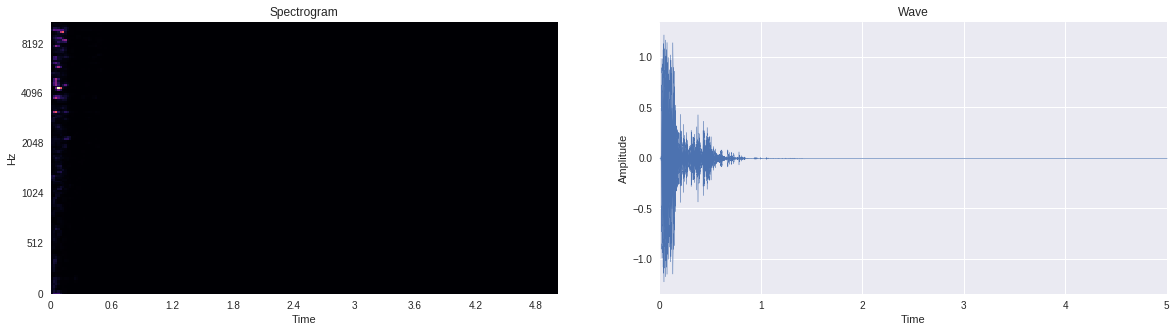

In [7]:
# Generating spectogram form from audio file.
plt.figure(figsize=(20,5))
plt.subplot(121)
data, sampling_rate = librosa.load(audio_files[random.randint(0,2000)], duration=5.0)
dim_of_spectrogram = librosa.feature.melspectrogram(data, sampling_rate)
plt.title("Spectrogram")
librosa.display.specshow(dim_of_spectrogram, y_axis='mel', x_axis='time')

# Generating wave form from audio file.
plt.subplot(122)
plt.title("Wave")
librosa.display.waveplot(data, sr=sampling_rate)
plt.ylabel('Amplitude')
plt.show()
Audio(data,rate = sampling_rate)

In [8]:
print("diamention of spectrogram:",dim_of_spectrogram.shape)
print("sampling_rate:",sampling_rate)

diamention of spectrogram: (128, 216)
sampling_rate: 22050


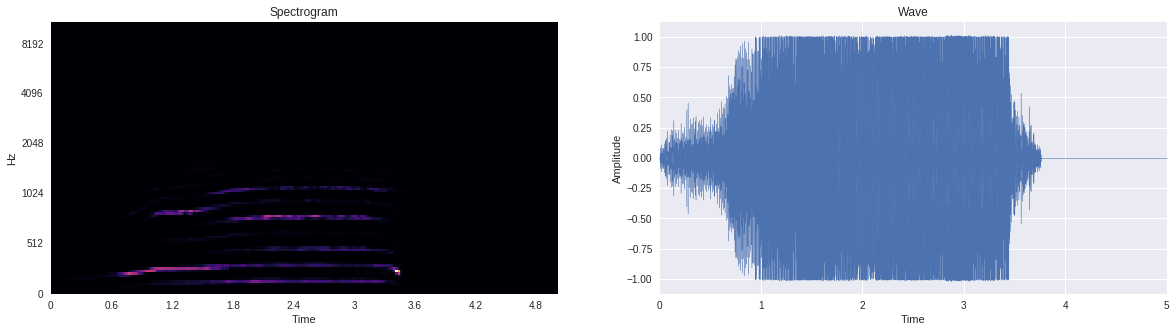

In [9]:
# Generating spectogram form from audio file.
plt.figure(figsize=(20,5))
plt.subplot(121)
data, sampling_rate = librosa.load(audio_files[random.randint(0,2000)], duration=5.0)
dim_of_spectrogram = librosa.feature.melspectrogram(data, sampling_rate)
plt.title("Spectrogram")
librosa.display.specshow(dim_of_spectrogram, y_axis='mel', x_axis='time')

# Generating wave form from audio file.
plt.subplot(122)
plt.title("Wave")
librosa.display.waveplot(data, sr=sampling_rate)
plt.ylabel('Amplitude')
plt.show()
Audio(data,rate = sampling_rate)

In [10]:
print("size of spectrogram:",dim_of_spectrogram.size)

size of spectrogram: 27648


## Fetch the dataset from colab.



*   fetching the data from colab into variable to performing the task.
*   it will take 5 to 6 minutes
*  here "res_type" used to fetch the data fast from colab.
*  here temporary _audio_files keep original audio files




In [0]:
number_of_audio_files = len(audio_files)
temporary_audio_files = []
for i in range(number_of_audio_files):
  temporary_audio_file, sampling_rate = librosa.load(audio_files[i],res_type='kaiser_fast')
  temporary_audio_files.append(temporary_audio_file)

## Replicating  audio files to increase the size.

*   from now the variable "replicated_audio_files" hold all audio files of 10seconds.



In [0]:
temporary_audio_files = np.array(temporary_audio_files)
replicated_audio_files = np.c_[temporary_audio_files,temporary_audio_files]

### Visualizing one random audio file after replicating



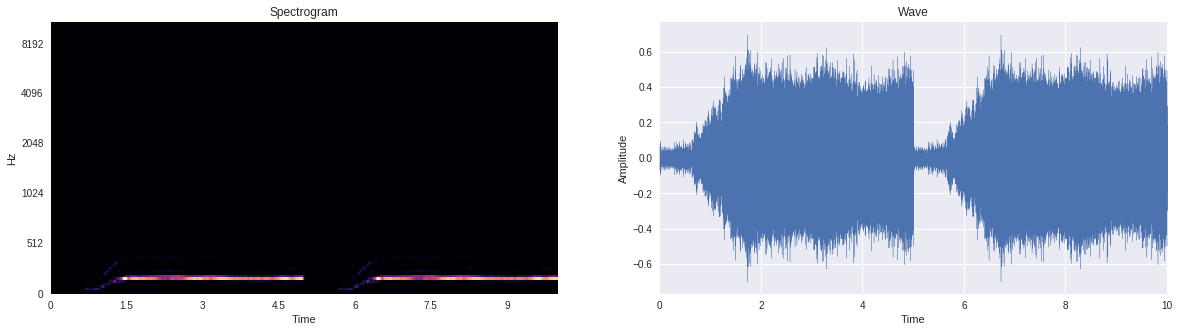

In [13]:
# spectrogram format.
plt.figure(figsize=(20,5))
plt.subplot(121)
data = replicated_audio_files[random.randint(0,2000)]
dim_of_spectrogram = librosa.feature.melspectrogram(data, sampling_rate)
plt.title("Spectrogram")
librosa.display.specshow(dim_of_spectrogram, y_axis='mel', x_axis='time')

# wave format.
plt.subplot(122)
plt.title("Wave")
librosa.display.waveplot(data, sr=sampling_rate)
plt.ylabel('Amplitude')
plt.show()
Audio(data,rate = sampling_rate)

## Augmentation of 5seconds audio files.

*   replicating the audio files also comes in augmentation but i created it separatly because i want to train our model separate from replicated data.
*   since our data is not sufficient to train the model, it's because i am writting this after training the model and the accuracy was poor.



In [0]:
# It will take less than one minute for augmentation.
size_of_audio_files = len(temporary_audio_files[0])
augmented_audio_files1 = []
augmented_audio_files2 = []
for i in range(number_of_audio_files):
  # Adding white noise
  augmented_audio_files1.append(temporary_audio_files[i] + 0.005*np.random.randn(size_of_audio_files))
  # Shifting the sound
  augmented_audio_files2.append(np.roll(temporary_audio_files[i], sampling_rate//10))


*   Adding all the training dataset in the "augmented_audio_files3" variable

*   click on ignore when "memory uses close to the limit" dialog box is generated.

In [0]:
#after running this cell our number of training example will becomes 6000
augmented_audio_files3 = list(temporary_audio_files)
augmented_audio_files3.extend(augmented_audio_files1)
augmented_audio_files3.extend(augmented_audio_files2)
augmented_audio_files3 = np.array(augmented_audio_files3)

In [0]:
# when i thought to replicate the 5seconds augumented data then kernal died.
# i think it's because still need more gpu memory.

#replicated_augmented_audio_files = np.c_[augmented_audio_files3,augmented_audio_files3]

## Generating spectrogram of 5seconds  audio files it will take 6 to 7 minutes




In [0]:
spectrogram_files = []
for i in range(number_of_audio_files):
  spectrogram_files.append(librosa.feature.melspectrogram(temporary_audio_files[i], sampling_rate))
spectrogram_files = np.array(spectrogram_files)

## Generating spectrogram of 10seconds  replicated audio files it will take 6 to 7 minutes

In [0]:
replicated_spectrogram_files = []
for i in range(number_of_audio_files):
  replicated_spectrogram_files.append(librosa.feature.melspectrogram(replicated_audio_files[i], sampling_rate))
replicated_spectrogram_files = np.array(replicated_spectrogram_files)

## Generating Superviser.

*  extracting the targets from "audio_files" variable because it hold the name of audio files.(target is given in file name.)

*    generating target corresponding to our training exaple.



In [12]:
# target extraction
superviser = []
for file in audio_files:
  superviser.append(int(file[22])-1)
  
# target increasing corresponding to our training exaple.
from itertools import chain
y = [superviser]*3
y = list(chain.from_iterable(y))
print("number of training example:",len(augmented_audio_files3))
print("length of target(updated superviser) variable:",len(y))

number of training example: 6000
length of target(updated superviser) variable: 6000


## One hot encoding

In [35]:
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded
y = encode(np.array(y))

Shape of data (BEFORE encode): (6000,)
Shape of data (AFTER  encode): (6000, 5)



Using TensorFlow backend.


## Split into training and testing dataset

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(augmented_spectrogram_files, y,test_size = 0.025,random_state=5)

#<center> Training the model-2 (experiment)</center>
*    create the model
*    compile the model
*     train the model



In [0]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,216)),
    
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# compile the model
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model2.fit(train_x, train_y, epochs=100)

#<center> Training the model-1 (experiment)</center>
*    create the model
*    compile the model
*     train the model



In [17]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,216)),
    
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])


# compile the model
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model1.fit(train_x,train_y, epochs=10)

Epoch 1/10
5850/5850 [==============================] - 7s 1ms/step - loss: 9.0597 - acc: 0.2299
Epoch 2/10
5850/5850 [==============================] - 6s 1ms/step - loss: 3.5070 - acc: 0.2839
Epoch 3/10
5850/5850 [==============================] - 6s 1ms/step - loss: 2.2154 - acc: 0.2911
Epoch 4/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.9614 - acc: 0.3036
Epoch 5/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.8584 - acc: 0.3060
Epoch 6/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.7806 - acc: 0.3056
Epoch 7/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.7499 - acc: 0.3089
Epoch 8/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.7547 - acc: 0.3099
Epoch 9/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.7587 - acc: 0.3116
Epoch 10/10
5850/5850 [==============================] - 6s 1ms/step - loss: 1.6952 - acc: 0.3125


#<center> Training the model-3 (experiment)</center>
*    create the model
*    compile the model
*     train the model



In [17]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,216)),
    
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# compile the model
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model3.fit(spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 10.6620 - acc: 0.2015
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.5956 - acc: 0.2700
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.4909 - acc: 0.2875
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.1665 - acc: 0.3170
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.0644 - acc: 0.3405
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.7862 - acc: 0.3590
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.0247 - acc: 0.3585
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.8352 - acc: 0.3700
Epoch 9/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3499 - acc: 0.4075
Epoch 10/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.0420 - acc: 0.3665


#<center> Training the model-4 (experiment)</center>
*    create the model
*    compile the model
*     train the model



In [18]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,216)),
    
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# compile the model
model4.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model4.fit(spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 2s 1ms/step - loss: 10.2899 - acc: 0.1980
Epoch 2/10
2000/2000 [==============================] - 2s 1ms/step - loss: 9.3786 - acc: 0.2580
Epoch 3/10
2000/2000 [==============================] - 2s 1ms/step - loss: 8.6652 - acc: 0.3090
Epoch 4/10
2000/2000 [==============================] - 2s 1ms/step - loss: 7.8968 - acc: 0.3415
Epoch 5/10
2000/2000 [==============================] - 2s 1ms/step - loss: 8.0848 - acc: 0.3380
Epoch 6/10
2000/2000 [==============================] - 2s 1ms/step - loss: 7.6137 - acc: 0.3750
Epoch 7/10
2000/2000 [==============================] - 2s 1ms/step - loss: 7.2973 - acc: 0.3915
Epoch 8/10
2000/2000 [==============================] - 2s 1ms/step - loss: 6.8990 - acc: 0.3870
Epoch 9/10
2000/2000 [==============================] - 2s 1ms/step - loss: 6.4350 - acc: 0.3865
Epoch 10/10
2000/2000 [==============================] - 2s 1ms/step - loss: 5.3402 - acc: 0.4130


#<center> Training the model-5 (experiment)</center>
*    create the model
*    compile the model
*     train the model



In [19]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,216)),
    
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
   
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# compile the model
model5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model5.fit(spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 9.8345 - acc: 0.1950
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.6053 - acc: 0.2460
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.1824 - acc: 0.2745
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.2298 - acc: 0.2780
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.7567 - acc: 0.3060
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.6967 - acc: 0.3130
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.8157 - acc: 0.3095
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3177 - acc: 0.3585
Epoch 9/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.3248 - acc: 0.3540
Epoch 10/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.4182 - acc: 0.3425


#<center> Training the model-6 (experiment)</center>
*    replicated
*    create the model
*    compile the model
*     train the model


In [20]:
model6 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,431)),
    
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
   
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# compile the model
model6.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model6.fit(replicated_spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 28s 14ms/step - loss: 11.9607 - acc: 0.2015
Epoch 2/10
2000/2000 [==============================] - 26s 13ms/step - loss: 11.5378 - acc: 0.2375
Epoch 3/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.3041 - acc: 0.2635
Epoch 4/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.7212 - acc: 0.2410
Epoch 5/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.5065 - acc: 0.2555
Epoch 6/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.2302 - acc: 0.2800
Epoch 7/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.2070 - acc: 0.2850
Epoch 8/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.1603 - acc: 0.2870
Epoch 9/10
2000/2000 [==============================] - 27s 13ms/step - loss: 11.0029 - acc: 0.2965
Epoch 10/10
2000/2000 [==============================] - 27s 13ms/step - loss: 10.9630 - acc: 0.2970

#<center> Training the model-7 (experiment)</center>
*    replicated_audio_files
*    create the model
*    compile the model
*     train the model


In [23]:
model7 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,431)),
    
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
        
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# compile the model
model7.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model7.fit(replicated_spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 14s 7ms/step - loss: 11.6997 - acc: 0.1965
Epoch 2/10
2000/2000 [==============================] - 13s 7ms/step - loss: 11.1778 - acc: 0.2600
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 11.1478 - acc: 0.2615
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 10.8579 - acc: 0.2875
Epoch 5/10
2000/2000 [==============================] - 13s 7ms/step - loss: 10.8176 - acc: 0.2930
Epoch 6/10
2000/2000 [==============================] - 13s 7ms/step - loss: 10.9408 - acc: 0.2895
Epoch 7/10
2000/2000 [==============================] - 13s 7ms/step - loss: 11.2174 - acc: 0.2695
Epoch 8/10
2000/2000 [==============================] - 14s 7ms/step - loss: 10.8342 - acc: 0.3040
Epoch 9/10
2000/2000 [==============================] - 13s 7ms/step - loss: 10.7303 - acc: 0.3090
Epoch 10/10
2000/2000 [==============================] - 13s 7ms/step - loss: 10.6258 - acc: 0.3190


#<center> Training the model-8 (experiment)</center>
*    replicated_audio_files
*    create the model
*    compile the model
*     train the model


In [24]:
model8 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,431)),
    
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
        
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# compile the model
model8.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model8.fit(replicated_spectrogram_files,superviser, epochs=10)


Epoch 1/10
2000/2000 [==============================] - 8s 4ms/step - loss: 11.6864 - acc: 0.1995
Epoch 2/10
2000/2000 [==============================] - 7s 4ms/step - loss: 11.3402 - acc: 0.2355
Epoch 3/10
2000/2000 [==============================] - 7s 4ms/step - loss: 11.2383 - acc: 0.2500
Epoch 4/10
2000/2000 [==============================] - 7s 4ms/step - loss: 11.3775 - acc: 0.2440
Epoch 5/10
2000/2000 [==============================] - 7s 4ms/step - loss: 11.1402 - acc: 0.2700
Epoch 6/10
2000/2000 [==============================] - 7s 4ms/step - loss: 10.7124 - acc: 0.2940
Epoch 7/10
2000/2000 [==============================] - 7s 4ms/step - loss: 10.6438 - acc: 0.2995
Epoch 8/10
2000/2000 [==============================] - 7s 4ms/step - loss: 10.6709 - acc: 0.3005
Epoch 9/10
2000/2000 [==============================] - 7s 4ms/step - loss: 10.7436 - acc: 0.3010
Epoch 10/10
2000/2000 [==============================] - 7s 4ms/step - loss: 10.5079 - acc: 0.3205


#<center> Training the model-9 (experiment)</center>
*    replicated_audio_files
*    create the model
*    compile the model
*     train the model


In [25]:
model9 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,431)),
    
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
        
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])


# compile the model
model9.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model9.fit(replicated_spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 10.7227 - acc: 0.2010
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 10.3776 - acc: 0.2500
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.8573 - acc: 0.2945
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.6353 - acc: 0.2980
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.2877 - acc: 0.3145
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 9.0154 - acc: 0.3415
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.9961 - acc: 0.3480
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.9436 - acc: 0.3415
Epoch 9/10
2000/2000 [==============================] - 4s 2ms/step - loss: 8.6193 - acc: 0.3500
Epoch 10/10
2000/2000 [==============================] - 4s 2ms/step - loss: 7.5979 - acc: 0.3650


#<center> Training the model-10(experiment)</center>
*    replicated_audio_files
*    create the model
*    compile the model
*     train the model


In [41]:
model10 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,431)),
    
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
        
])

model10.add(tf.keras.layers.Dense(64))
model10.add(tf.keras.layers.Activation('relu'))
model10.add(tf.keras.layers.Dropout(0.5))

model10.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Activation('softmax'))          

# compile the model
model10.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model
model10.fit(replicated_spectrogram_files,superviser, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 29s 14ms/step - loss: 9.4645 - acc: 0.1985
Epoch 2/10
2000/2000 [==============================] - 26s 13ms/step - loss: 8.2399 - acc: 0.1970
Epoch 3/10
2000/2000 [==============================] - 26s 13ms/step - loss: 5.5352 - acc: 0.1920
Epoch 4/10
2000/2000 [==============================] - 26s 13ms/step - loss: 4.1092 - acc: 0.2050
Epoch 5/10
2000/2000 [==============================] - 27s 13ms/step - loss: 2.9702 - acc: 0.1835
Epoch 6/10
2000/2000 [==============================] - 26s 13ms/step - loss: 2.8681 - acc: 0.1860
Epoch 7/10
2000/2000 [==============================] - 26s 13ms/step - loss: 3.0810 - acc: 0.2175
Epoch 8/10
2000/2000 [==============================] - 26s 13ms/step - loss: 2.5985 - acc: 0.1975
Epoch 9/10
2000/2000 [==============================] - 26s 13ms/step - loss: 2.9083 - acc: 0.2090
Epoch 10/10
2000/2000 [==============================] - 26s 13ms/step - loss: 2.5567 - acc: 0.2015


In [0]:
from AudioDataGenerator import AudioDataGenerator

datagen = AudioDataGenerator(
                featurewise_center=True,
                featurewise_std_normalization=True,
                shift=.2,
                horizontal_flip=True,
                zca_whitening=True)

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x,y_train,batch_size=32),
                    steps_per_epoch = len(x_train)/32,
                    epochs = 100)